### Import neccessary Libraries

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading Data Set

In [145]:
df = pd.read_csv('iris.csv')
df.head(9)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa


In [146]:
df['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

###  X & y

In [147]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
X[0:9]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [148]:
#X[0:,0] ----> soton aval

In [149]:
y = df['variety'].values
y[0:9]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa'], dtype=object)

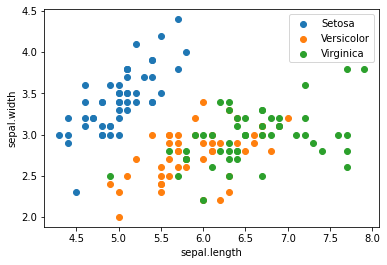

In [150]:
plt.scatter(X[0:,0][y=='Setosa'], X[0:,1][y=='Setosa'], label = 'Setosa')
plt.scatter(X[0:,0][y=='Versicolor'], X[0:,1][y=='Versicolor'], label = 'Versicolor')
plt.scatter(X[0:,0][y=='Virginica'], X[0:,1][y=='Virginica'], label = 'Virginica')

plt.xlabel("sepal.length")
plt.ylabel("sepal.width")

plt.legend()

plt.show()

### train/test Split

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (120, 4) (120,)
Test set:  (30, 4) (30,)


### Classification --> KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
KNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)


In [153]:
pred_y = KNN_model.predict(X_test)

In [154]:
pred_y[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [155]:
y_test[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa'], dtype=object)

### Accuracy evaluation

In [156]:
from sklearn import metrics

print('Train set accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set accuracy:', metrics.accuracy_score(y_test, pred_y))

Train set accuracy: 0.9833333333333333
Test set accuracy: 0.9666666666666667


### jaccard index

In [157]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, pred_y, pos_label = 'Virginica ', average=None)

C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'Virginica ') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


array([1. , 0.8, 0.9])

### Confusion Matrix

<AxesSubplot:>

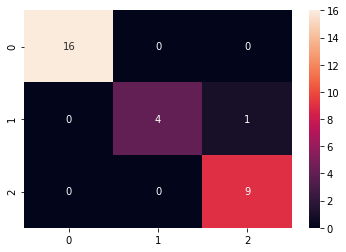

In [158]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,pred_y)

sns.heatmap(cm,annot=True)

In [159]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.80      0.89         5
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



### F1-Score

In [160]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_y, average = 'weighted')

0.9656920077972709

### Classification --> Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4).fit(X_train, y_train)

In [162]:
pred_y_tree = DT_model.predict(X_test)

In [163]:
pred_y_tree[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [164]:
y_test[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa'], dtype=object)

### Accuracy Evaluation

In [165]:
from sklearn import metrics

print("Decision Tree's Acuuracy: ", metrics.accuracy_score(y_test, pred_y_tree))

Decision Tree's Acuuracy:  0.9666666666666667


### Jaccard index

In [166]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, pred_y_tree, pos_label = 'Virginica ', average=None)

C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'Virginica ') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


array([1. , 0.8, 0.9])

### Confusion Matrix

<AxesSubplot:>

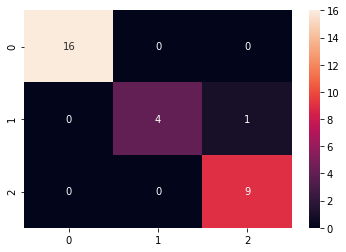

In [167]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,pred_y_tree)

sns.heatmap(cm,annot=True)

In [168]:
print(classification_report(y_test, pred_y_tree))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.80      0.89         5
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



### F1-Score

In [169]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_y_tree, average = 'weighted')

0.9656920077972709

### Classification --> Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)

pred_y_lr = LR_model.predict(X_test)

In [171]:
pred_y_lr[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [172]:
y_test[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa'], dtype=object)

### Accuracy Evaluation

In [173]:
from sklearn import metrics

print("Logistic Regression's Acuuracy: ", metrics.accuracy_score(y_test, pred_y_lr))

Logistic Regression's Acuuracy:  0.8333333333333334


### Jaccard index

In [174]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, pred_y_lr, pos_label = 'Virginica ', average=None)

C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'Virginica ') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


array([1.        , 0.        , 0.64285714])

### Confusion Matrix

<AxesSubplot:>

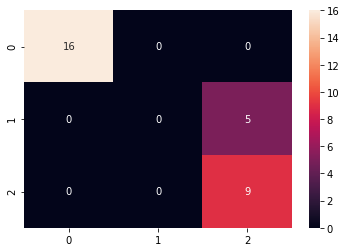

In [175]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,pred_y_lr)

sns.heatmap(cm,annot=True)

In [176]:
print(classification_report(y_test, pred_y_lr))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.00      0.00      0.00         5
   Virginica       0.64      1.00      0.78         9

    accuracy                           0.83        30
   macro avg       0.55      0.67      0.59        30
weighted avg       0.73      0.83      0.77        30



C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### F1-Score

In [177]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_y_lr, average = 'weighted')

0.7681159420289856

### Classification --> SVM

In [178]:
from sklearn import svm

svm_model = svm.SVC(kernel = 'rbf').fit(X_train, y_train)

pred_y_svm = svm_model.predict(X_test)

In [179]:
pred_y_svm[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [180]:
y_test[0:9]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa'], dtype=object)

### Accuracy Evaluation

In [181]:
from sklearn import metrics

print("Support Vector Machine's Acuuracy: ", metrics.accuracy_score(y_test, pred_y_svm))

Support Vector Machine's Acuuracy:  0.9666666666666667


### Jaccard index

In [182]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, pred_y_svm, pos_label = 'Virginica ', average=None)

C:\Users\m\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'Virginica ') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


array([1. , 0.8, 0.9])

### Confusion Matrix

<AxesSubplot:>

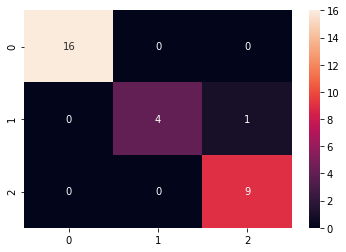

In [183]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,pred_y_svm)

sns.heatmap(cm,annot=True)

In [184]:
print(classification_report(y_test, pred_y_svm))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.80      0.89         5
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



### F1-Score

In [185]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_y_svm, average = 'weighted')

0.9656920077972709